In [18]:
# !pip install pyDOE
# !pip install smt

In [19]:
# Support for math
import numpy as np
import math

# Plotting tools
from matplotlib import pyplot as plt
import matplotlib as mplt

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#Data frames tools
import pandas as pd

#LHS sampling
from pyDOE import lhs


# Latin Hypercube Sampling

In [20]:
from smt.sampling_methods import LHS
import random

#xlimits = np.array([[0.0, 4.0], [0.0, 3.0],[0.0,3.0],[0.0,3.0]])
xlimits = np.array([[75.0, 100.0], [33.0, 100.0],[20.0,170.0],[30.0,600.0]])
sampling = LHS(xlimits=xlimits,random_state = np.random.RandomState(0))

num = 15
x = sampling(num)

lhs_data = pd.DataFrame(x, columns=['sulf', 'anly', 'temp','time'])//1
lhs_data


,sulf,anly,temp,time
0,85.0,70.0,25.0,466.0
1,82.0,62.0,75.0,239.0
2,79.0,88.0,165.0,543.0
3,99.0,53.0,35.0,505.0
4,89.0,84.0,65.0,49.0
5,92.0,75.0,105.0,315.0
6,80.0,39.0,85.0,125.0
7,90.0,57.0,125.0,163.0
8,94.0,66.0,155.0,353.0
9,77.0,93.0,55.0,277.0


## STEP2: Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select the 'temp' column for clustering
temp_data = lhs_data[['temp']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
temp_data_scaled = scaler.fit_transform(temp_data)

# Choose the number of clusters
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
lhs_data['temp_cluster'] = kmeans.fit_predict(temp_data_scaled)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_

# Get the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Display the centroids
print("Centroids of Temperature Clusters:")
print(centroids)


Centroids of Temperature Clusters:
[[105.]
 [ 50.]
 [150.]]


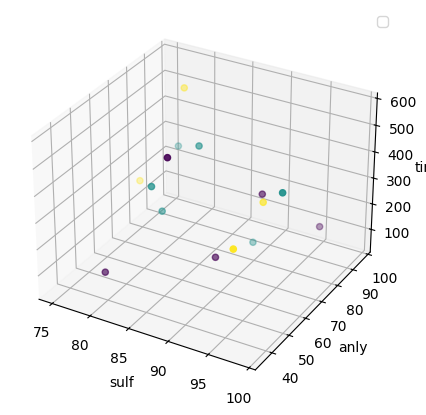

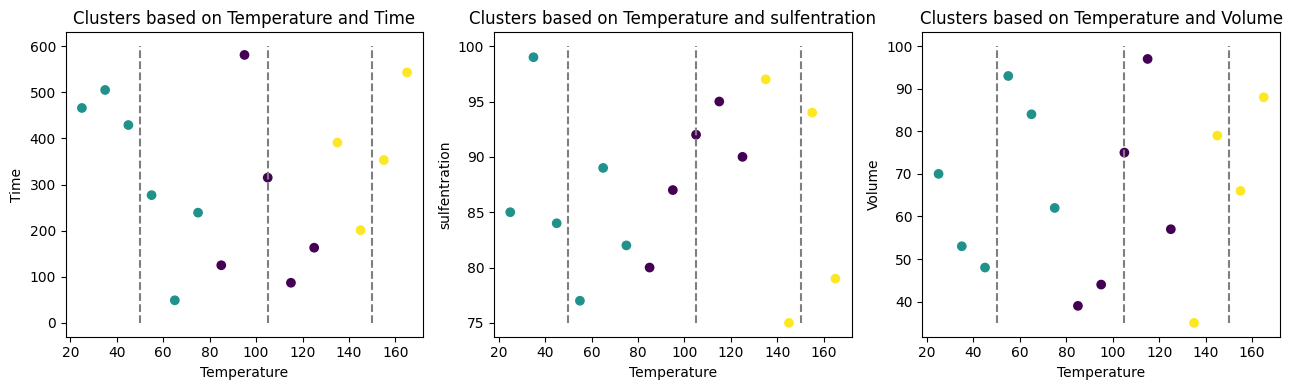

In [28]:
# Visualize the clusters
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='3d')

# Plot the clustered data points
ax.scatter(lhs_data['sulf'], lhs_data['anly'], lhs_data['time'], c=lhs_data['temp_cluster'], cmap='viridis', marker='o')

# Plot the centroids
#ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')

ax.set_xlabel('sulf')
ax.set_ylabel('anly')
ax.set_zlabel('time')
ax.legend()
plt.show()


# 2D visualization of the clusters
columns = ['time', 'sulf', 'anly']
y_labels = ['Time', 'sulfentration', 'Volume']
y_lims = [(0, 600), (75, 100), (35, 100)]

fig = plt.figure(figsize=(13,4))
for i, col in enumerate(columns):
    plt.subplot(1, 3, i+1)
    plt.scatter(lhs_data['temp'], lhs_data[col], c=lhs_data['temp_cluster'], cmap='viridis')
    plt.vlines(centroids, y_lims[i][0], y_lims[i][1], color='tab:grey', linestyle='dashed')
    plt.xlabel('Temperature')
    plt.ylabel(y_labels[i])
    plt.title(f'Clusters based on Temperature and {y_labels[i]}')

plt.tight_layout()
plt.show()